In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

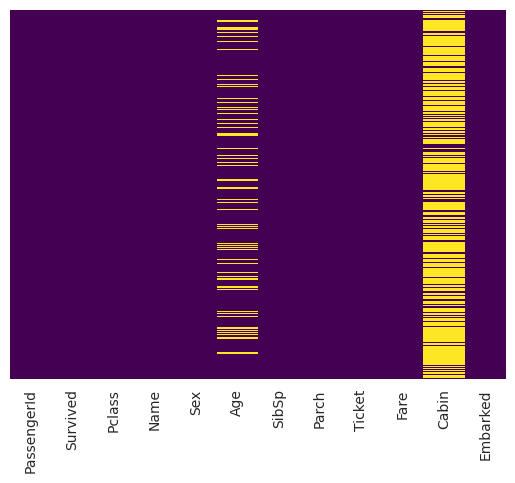

In [5]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

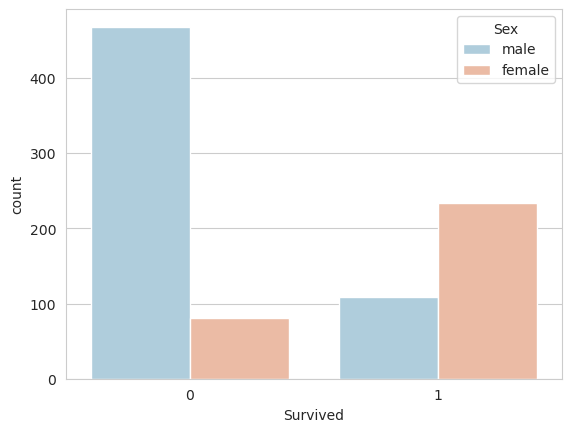

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

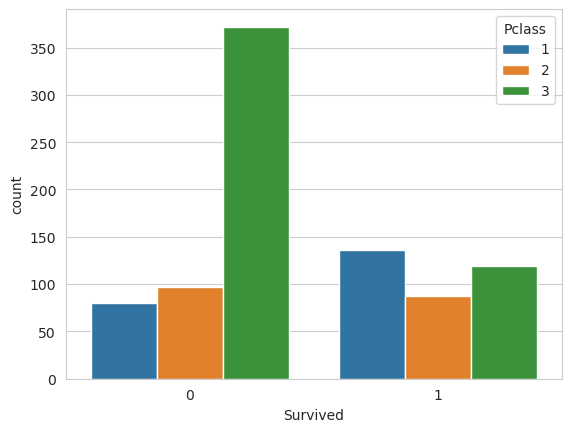

In [7]:
sns.countplot(x='Survived', data=train, hue='Pclass')

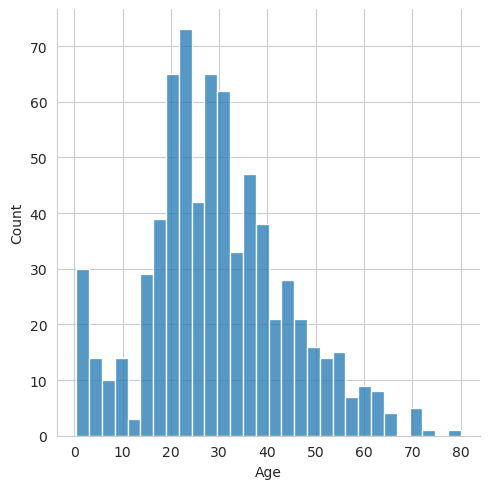

In [8]:
sns.displot(train['Age'].dropna(), bins=30)

<AxesSubplot:>

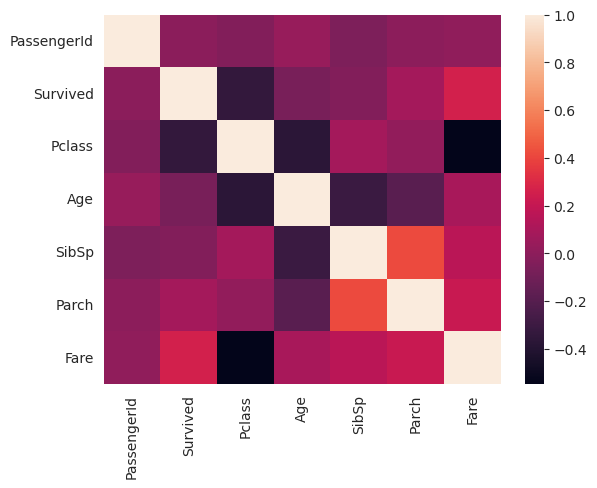

In [9]:
sns.heatmap(train.corr())

<AxesSubplot:xlabel='SibSp', ylabel='count'>

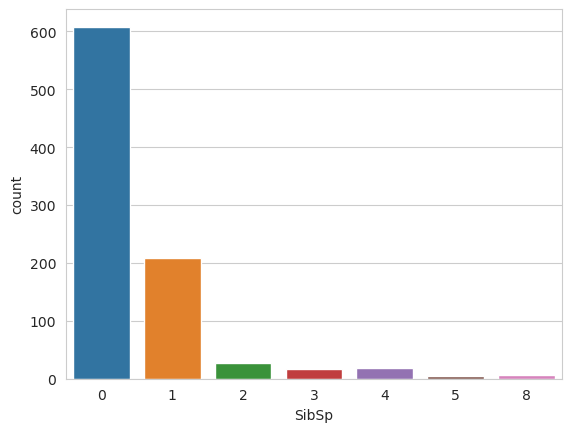

In [10]:
sns.countplot(x='SibSp', data=train)

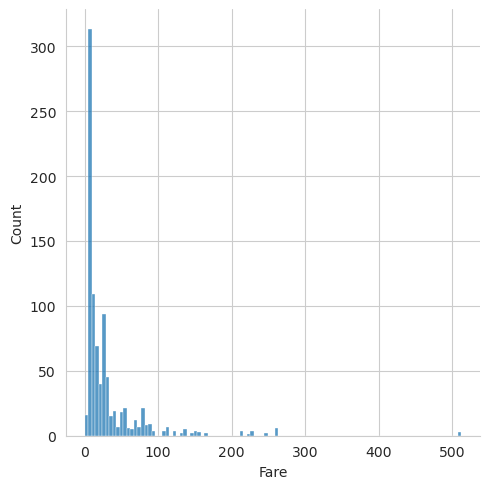

In [11]:
sns.displot(x='Fare', data=train)

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

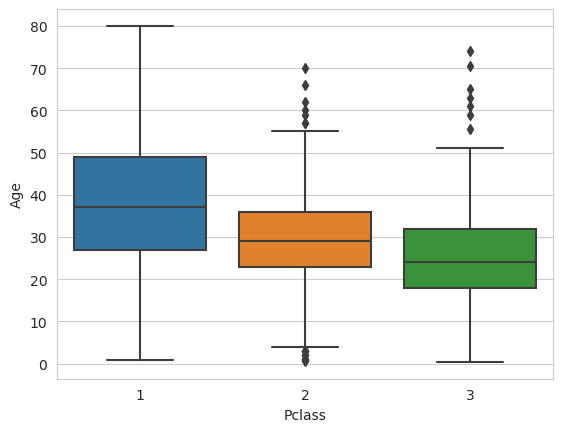

In [14]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
        
    else: return Age

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

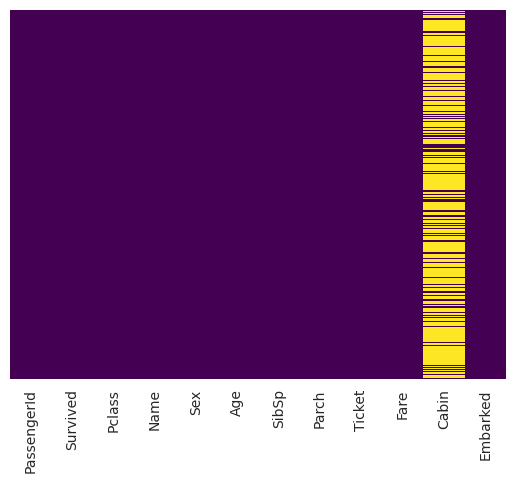

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [22]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [23]:
train.drop('PassengerId', axis=1, inplace=True)
train.head() 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train, y_train)

/home/sohom/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]])

In [36]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [37]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,1,30.0,0,0,93.5000,0,0,1
510,3,29.0,0,0,7.7500,1,1,0
446,2,13.0,0,1,19.5000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
691,3,4.0,0,1,13.4167,0,0,0


In [42]:
y_test.head(50)

331    0
700    1
748    0
751    1
481    0
845    0
740    1
287    0
669    1
241    1
413    0
636    0
448    1
127    1
630    1
672    0
889    1
500    0
495    0
323    1
614    0
182    0
727    1
109    1
873    0
694    0
138    0
361    0
7      0
548    0
717    1
679    1
274    1
74     1
171    0
585    1
365    0
603    0
16     0
724    1
550    1
186    1
237    1
135    0
808    0
298    1
392    0
536    0
189    0
674    0
Name: Survived, dtype: int64

In [41]:
y_train.head(50)

520    1
510    1
446    1
2      1
691    1
195    1
790    0
257    1
39     1
234    0
832    0
341    1
646    0
670    1
805    0
266    0
824    0
64     0
624    0
299    1
188    0
29     0
782    0
640    0
682    0
780    1
597    0
363    0
279    1
626    0
516    1
18     0
4      0
565    0
34     0
69     0
569    1
60     0
354    0
306    1
830    1
130    0
48     0
641    1
146    1
15     1
557    0
710    1
333    0
607    1
Name: Survived, dtype: int64